In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr
import sklearn

In [28]:
all_df=pd.read_csv('/Users/yangyufeng/Downloads/DSML_CW2.csv')

In [30]:
all_df_label = pd.read_csv('/Users/yangyufeng/Downloads/DSML_Labels.csv')
all_df_label

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


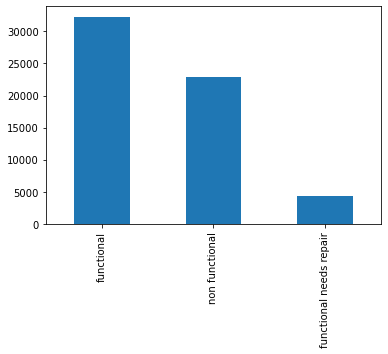

In [31]:
a = 'status_group'
all_df_label[a].value_counts().plot(kind='bar')
plt.show()

In [32]:
rows_with_missing_values = all_df[all_df.isnull().any(axis=1)]

# 获取id
ids_with_missing_values = rows_with_missing_values.iloc[:, 0]

# 有几个，看起来近一半数据行有缺失值。。
print(len(list(ids_with_missing_values)))

31587


In [33]:
missing_values_per_column = all_df.isnull().sum()

print(missing_values_per_column)

# 主要的缺失值在于供水商的名字。。这显然不重要

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [40]:
# 删除'scheme_name'列
all_df_dropped0 = all_df.drop(columns=['scheme_name'])
missing_values_per_column = all_df_dropped0.isnull().sum()

print(missing_values_per_column)

id                          0
amount_tsh                  0
date_recorded               0
funder                   3635
gps_height                  0
installer                3655
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                371
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting           3334
recorded_by                 0
scheme_management        3877
permit                   3056
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_g

### 接着来处理剩下的null值
1. funder 

In [44]:
all_df_dropped0['funder'].value_counts()

3635

#### 本次数据集的所有缺失值，似乎都是关于供水商的？


In [ ]:
value_counts()

In [10]:
print(all_df.nunique())

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

In [11]:
print(all_df.describe())
# 0有些多，0可能是无意义的值

                 id     amount_tsh    gps_height     longitude      latitude  \
count  59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
mean   37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
std    21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
min        0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
50%    37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
75%    55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
max    74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  59400.000000  59400.000000   59400.000000  59400.000000   
mean       0.474141     15.297003       5.629747    179.909983   
std       12.236230     17.587406       9.633649    471.482176   
min        0.00

In [12]:
zero_counts = (all_df == 0).sum()
non_null_counts = all_df.count() 
zero_proportions = zero_counts / non_null_counts

# 结果
print("0值的比例")
print(zero_proportions)

0值的比例
id                       0.000017
amount_tsh               0.700993
date_recorded            0.000000
funder                   0.000000
gps_height               0.344074
installer                0.000000
longitude                0.030505
latitude                 0.000000
wpt_name                 0.000000
num_private              0.987256
basin                    0.000000
subvillage               0.000000
region                   0.000000
region_code              0.000000
district_code            0.000387
lga                      0.000000
ward                     0.000000
population               0.359949
public_meeting           0.090162
recorded_by              0.000000
scheme_management        0.000000
scheme_name              0.000000
permit                   0.310450
construction_year        0.348636
extraction_type          0.000000
extraction_type_group    0.000000
extraction_type_class    0.000000
management               0.000000
management_group         0.000000
payment 

# 总结 ---------------
建议删除‘amount_tsh’和‘num_private’ 由于过高的0比例    
以及删除‘scheme_name’ 由于过半的缺失

In [13]:
all_df_dropped = all_df.drop(columns=['scheme_name', 'amount_tsh','num_private'])

In [14]:
all_df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   basin                  59400 non-null  object 
 9   subvillage             59029 non-null  object 
 10  region                 59400 non-null  object 
 11  region_code            59400 non-null  int64  
 12  district_code          59400 non-null  int64  
 13  lga                    59400 non-null  object 
 14  ward                   59400 non-null  object 
 15  po

In [23]:
# 首先解决的是
all_df_dropped.loc[all_df_dropped.isna().any(axis=1)].shape

(11112, 37)

In [15]:
all_df = all_df_dropped
zero_counts = (all_df == 0).sum()
non_null_counts = all_df.count() 
zero_proportions = zero_counts / non_null_counts

# 结果
print("0值的比例")
print(zero_proportions)

0值的比例
id                       0.000017
date_recorded            0.000000
funder                   0.000000
gps_height               0.344074
installer                0.000000
longitude                0.030505
latitude                 0.000000
wpt_name                 0.000000
basin                    0.000000
subvillage               0.000000
region                   0.000000
region_code              0.000000
district_code            0.000387
lga                      0.000000
ward                     0.000000
population               0.359949
public_meeting           0.090162
recorded_by              0.000000
scheme_management        0.000000
permit                   0.310450
construction_year        0.348636
extraction_type          0.000000
extraction_type_group    0.000000
extraction_type_class    0.000000
management               0.000000
management_group         0.000000
payment                  0.000000
payment_type             0.000000
water_quality            0.000000
quality_

In [32]:
# construction_year        0.348636 显然年份不应该有0存在
non_zero_non_null_avg = all_df['construction_year'][all_df['construction_year'] > 0].mean()

# 替换0值和NaN值为计算得到的平均值
all_df['construction_year'] = all_df['construction_year'].replace(0, non_zero_non_null_avg)
all_df['construction_year'] = all_df['construction_year'].fillna(non_zero_non_null_avg)


1996.8146855851587